In [ ]:
#Superdense coding. Parecido com o quantum teleportation mas agora enviamos 2 bits usando 1 qubit

In [21]:
from qiskit import Aer, QuantumCircuit, execute

In [16]:
def create_bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

In [17]:
def encode_message(qc,qubit,msg):
    if msg == "00":
        pass
    elif msg == "01":
        qc.x(qubit)
    elif msg == "10":
        qc.z(qubit)
    elif msg == "11":
        qc.x(qubit)
        qc.z(qubit)


In [18]:
def decode_message(qc,a,b):
    qc.cx(a,b)
    qc.h(a)

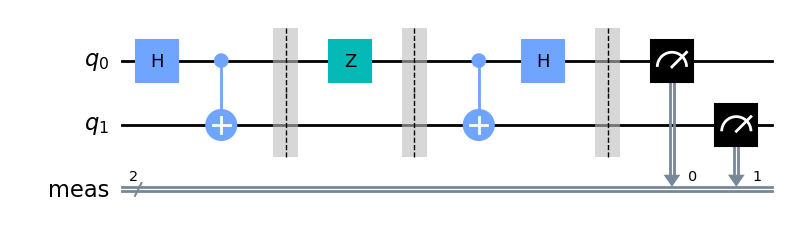

In [19]:
qc = QuantumCircuit(2)

create_bell_pair(qc,0,1)
qc.barrier()

message = "10"

encode_message(qc,0,message)
qc.barrier()

decode_message(qc,0,1)

qc.measure_all()

qc.draw('mpl')


In [20]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1000)
result=  job.result()
counts = result.get_counts(qc)

print(counts) #lembre que o qiskit inverte os bits

{'01': 1000}
